<a href="https://colab.research.google.com/github/Chandrashekhar569/OIBSIP/blob/main/Email_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

**Importing data**

In [2]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

**Drop unnecessary Columns and rename remaining Columns**

In [3]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1': 'label', 'v2': 'text'})

**Data Cleaning**

In [4]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

def clean_text(text):
    # remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # convert to lowercase and tokenize
    text = text.lower().split()

    # remove stopwords
    text = [stemmer.stem(word) for word in text if word not in stop_words]

    # join tokens back into string
    text = ' '.join(text)

    return text

data['text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Create a Binary label column**

In [5]:
data['label'] = np.where(data['label']=='spam', 1, 0)

**Split data into training and testing sets**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

**Transform text data into feature vectors using TF-IDF**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Train Naive Bayes classifier**

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

**predict on test set and evaluate model**

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9668161434977578


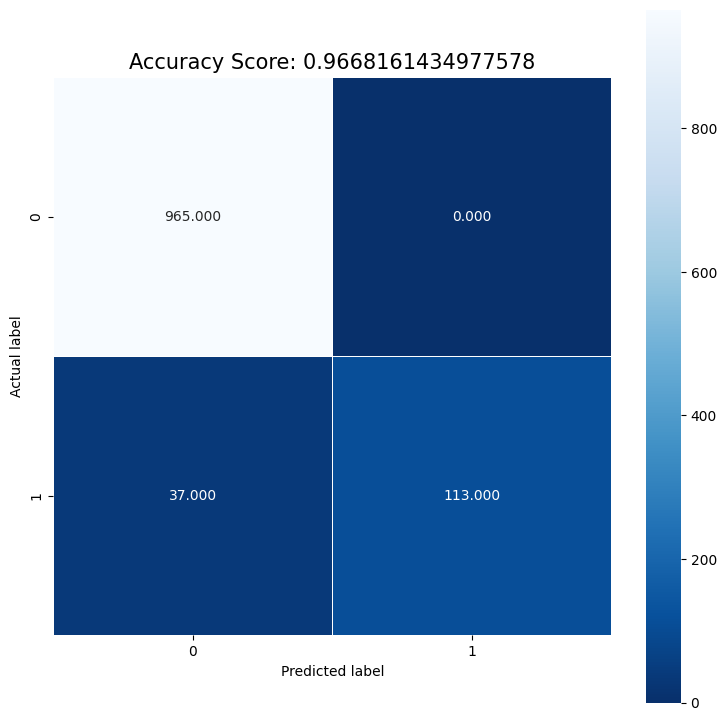

In [10]:
cm = confusion_matrix(y_test, clf.predict(X_test_tfidf))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, clf.predict(X_test_tfidf)))
plt.title(all_sample_title, size = 15);

**Predict whether some email messages are spam or ham**

In [11]:
emails = [
    "Congratulations! You have won a free trip to Hawaii. Reply now to claim your prize.",
    "Hi John, can you please send me the report by the end of the day?",
    "Get rich quick! Invest in this amazing opportunity today.",
    "Reminder: your appointment with Dr. Smith is tomorrow at 2pm.",
    "You have been selected to participate in a survey about customer satisfaction.",
]

for email in emails:
    email_cleaned = re.sub(r'http\S+|\S+@\S+|<[^>]+>', '', email).lower()
    email_cleaned = ' '.join([stemmer.stem(word) for word in email_cleaned.split() if word not in stop_words])
    email_vectorized = tfidf.transform([email_cleaned])
    predicted_class = clf.predict(email_vectorized)[0]
    if predicted_class == 1:
        print(email, "is spam!")
    else:
        print(email, "is not spam.")

Congratulations! You have won a free trip to Hawaii. Reply now to claim your prize. is spam!
Hi John, can you please send me the report by the end of the day? is not spam.
Get rich quick! Invest in this amazing opportunity today. is not spam.
Reminder: your appointment with Dr. Smith is tomorrow at 2pm. is not spam.
You have been selected to participate in a survey about customer satisfaction. is spam!
